## K-means clustering

- Use voice.csv file for this exercise set
- This dataset will be used in exercises 8, 9 and 10
- Dataset includes male and female voice samples with different features
- In this exercise you will use unsupervised machine learning method called K-means clustering for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and minfun (*minimum fundamental frequency measured across the acoustic signal*) columns. Filter data so that only forementioned columns will be included.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

voice = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & AI\voice.csv")
voices = voice.loc[:,["meanfun", "minfun"]]
voices[:5]

,meanfun,minfun
0,0.084279,0.015702
1,0.107937,0.015826
2,0.098706,0.015656
3,0.088965,0.017798
4,0.106398,0.016931


2 Run the predictions for the data so that it will be categorised for male and female data.

In [2]:
kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 100, random_state = 42)
y_kmeans = kmeans.fit_predict(voices)
y_kmeans

array([1, 1, 1, ..., 0, 0, 0], shape=(3168,), dtype=int32)

3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

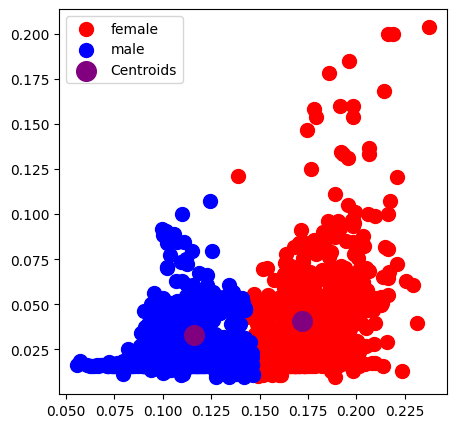

In [3]:
plt.figure(figsize = (5,5))
voices_array = voices.to_numpy()
plt.scatter(voices_array[y_kmeans == 0, 0], voices_array[y_kmeans == 0,1], s = 100, c = 'red', label = 'female')
plt.scatter(voices_array[y_kmeans == 1, 0], voices_array[y_kmeans == 1,1], s = 100, c = 'blue', label = 'male')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'purple', label = 'Centroids')
plt.legend()

4 Validate K-means clustering prediction results using confusion matrix.

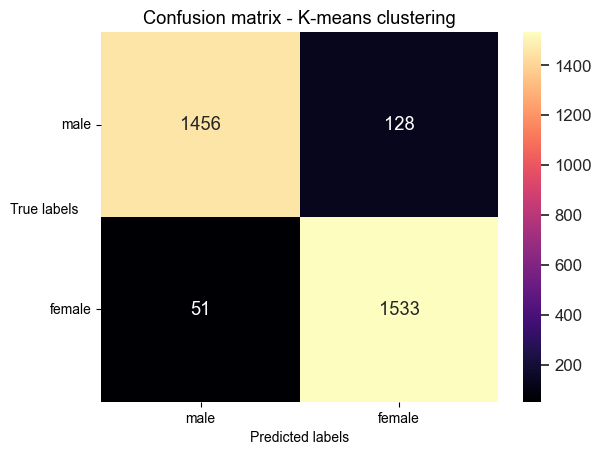

<Figure size 600x600 with 0 Axes>

In [4]:
truth = []
for i in voice['label']:
    if i == 'female':
        truth.append(0)
    else:
        truth.append(1)

labels = voice["label"].unique()

confusion_matrix = metrics.confusion_matrix(truth, y_kmeans)
confusion_matrix

ax=plt.axes()
sns.set(font_scale = 1.1)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix, annot = True, ax = ax, fmt='d', cmap ='magma')
ax.set_title('Confusion matrix - K-means clustering')
ax.set_xlabel('Predicted labels')
ax.set_xticklabels(labels)
ax.set_ylabel('True labels', rotation=0)
ax.set_yticklabels(labels, rotation=0)
plt.show()